In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline


In [2]:
# Load data
driving_log_csv = pd.read_csv("../ud-sim-data/driving_log.csv")

print("Number of rows: %d" % len(driving_log_csv))

driving_log_csv.head()

Number of rows: 8036


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [3]:
# Paths of center images
X_path = [driving_log_csv.loc[i]["center"] for i in range(len(driving_log_csv))]

# steering angle for images
y = [driving_log_csv.loc[i]["steering"] for i in range(len(driving_log_csv))]

In [4]:
print("X_path samples={}".format(X_path[0:3]))
print("Steering angle samples={}".format(y[0:3]))

X_path samples=['IMG/center_2016_12_01_13_30_48_287.jpg', 'IMG/center_2016_12_01_13_30_48_404.jpg', 'IMG/center_2016_12_01_13_31_12_937.jpg']
Steering angle samples=[0.0, 0.0, 0.0]


In [5]:
# Load images
X_images = [mpimg.imread("../ud-sim-data/" + path) for path in X_path[0:100]]

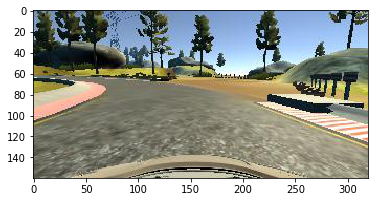

In [7]:
plt.imshow(X_images[9])

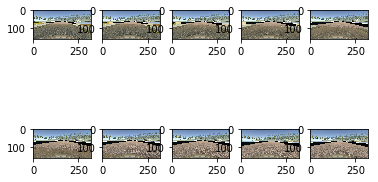

In [16]:
fig = plt.figure()

for index in range(10):
    #print('i={}, index={}'.format(i, index)) ### can't have prints in this loop or image does not display
    
    a = fig.add_subplot(2,5,index+1)
    image = X_images[index+80].squeeze()

    plt.imshow(image)

In [18]:
X = np.array(X_images)
X.shape

(100, 160, 320, 3)

In [19]:
X = X[:, 60:124, 0:320, :]
X.shape

(100, 64, 320, 3)

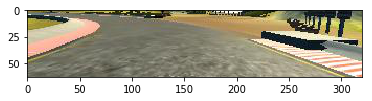

In [20]:
plt.imshow(X[9])

In [21]:
import cv2
X_resized = [cv2.resize(img,(64, 64), interpolation = cv2.INTER_CUBIC) for img in X]

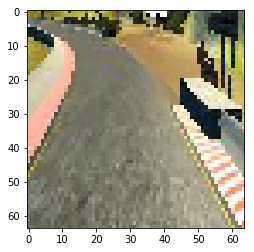

In [25]:
X_resized = np.array(X_resized)
X_resized.shape
plt.imshow(X_resized[9])

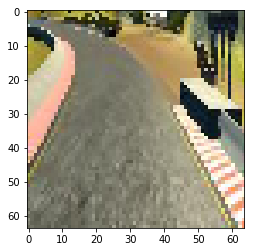

In [29]:
#http://stackoverflow.com/questions/40201846/resizing-ndarray-of-images-efficiently
from scipy.ndimage.interpolation import zoom
#(100, 64, 320, 3)
X=zoom(X,zoom=(1,1,64./320,1),order=1)
X.shape
plt.imshow(X[9])

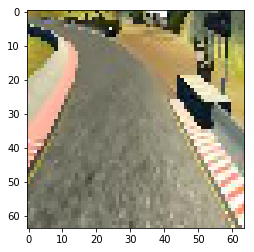

In [31]:
# save training data into pickle file
import pickle

train_data = { 'center_images': X, 'steering_angle': y}

pickle.dump( train_data, open( "train.p", "wb" ) )

loaded_train_data = pickle.load( open( "train.p", "rb" ) )
# print(loaded_train_data)

plt.imshow(loaded_train_data['center_images'][2])